Enter path to CSV: /Users/dduru/PythonProjects/data/smsspamcollection/SMSSpamCollection
Accuracy: 0.9557301664613357
Precision: 0.9898824772775312
Recall: 0.6824561403508772
F1: 0.8076293446858502


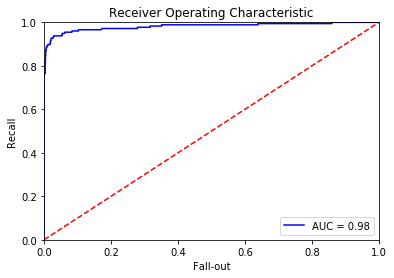

In [12]:
%run ../include/util.ipynb

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score, make_scorer
import matplotlib.pyplot as plt


# /Users/dduru/PythonProjects/data/smsspamcollection/SMSSpamCollection


df = read_csv_frame(delimiter = '\t', header = None)
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(df[1], df[0], random_state=11)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# solver='lbfgs'
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(X_train, Y_train)


# Accuracy
scores = cross_val_score(classifier, X_train, Y_train, cv=5)
print('Accuracy: %s' % np.mean(scores))


# Precision
precision_scorer = make_scorer(precision_score, pos_label='spam')
precisions = cross_val_score(classifier, X_train, Y_train, cv=5, scoring=precision_scorer)
print('Precision: %s' % np.mean(precisions))


# Recall
recall_scorer = make_scorer(recall_score, pos_label='spam')
recalls = cross_val_score(classifier, X_train, Y_train, cv = 5, scoring=recall_scorer)
print('Recall: %s' % np.mean(recalls))


# F1
f1_scorer = make_scorer(f1_score, pos_label='spam')
f1_scores = cross_val_score(classifier, X_train, Y_train, cv = 5, scoring = f1_scorer)
print('F1: %s' % np.mean(f1_scores))


predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(Y_test, predictions[:, 1], pos_label='spam')
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()








